# TRAINING MODELS
# Part 01: Linear Regression
- Using a 'closed-form' equation that directly computes the model hyperparameters (minimize the cost function over the training set)
- Using an iterative optimization approach called Gradient Descent to tweak the model parameters to minimize the cost function.
- Next, look at Polynomial Regression for more complex model that can fit the nonlinear datasets.
# 1. Linear Regression model prediction
$$\displaystyle{\hat{y} = \theta_0 + \theta_1x_1 + ... + \theta_nx_n}$$
- $\hat{y}$: the predicted value
- n: number of features
- $x_i: i^{th} $ feature value 
- $\theta_i$: model parameter, $\theta_0$ is the bias term, and feature weights $\theta_1, \theta_2, ..., \theta_n$
## 1.1. Linear Regression model prediction (vectorized form)
$$\displaystyle{\hat{y} = h_{\theta}(x) = \theta.x}$$
- $h_{\theta} \text{: the hypothesis function, using the model parameters } \theta$
- $\theta \text{: model's parameter vector, with bias term }\theta_0 \text{, and feature weights} \theta_1, ..., \theta_n$
- x: the instance's feature vector
- $\theta.x \text{: dot product of the vector, which equal to }\theta_0x_0 + ... + \theta_nx_n$ 
## 1.2. Cost function
RMSE is common performance measure of a regression model. So, to train a linear regression model, we need to find the $\theta$ that __minimize__ the RMSE. Learning algorithms will often optimize a different loss function during training than the performance measure used to evaluate the final model.
### MSE cost function for a Linear Regression model
$$\displaystyle{MSE(X,h_{\theta}) = \frac{1}{m}\sum^{m}_{i=1}\left(\theta^Tx^{(i)} - y^{(i)}\right)^2}$$
### The Normal Equation
To find the value of $\theta$ to minimize the MSE, the Normal equation (called closed-form solution) that gives the result directly.
$$\hat{\theta} = (X^TX)^{-1}X^Ty$$
- $\hat{\theta} \text{ is the value of } \theta$ that minimize the cost function.
- y is the vector of target values containing $y^1, ..., y^m$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)
m = 100 # instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.rand(m, 1)  # column vector

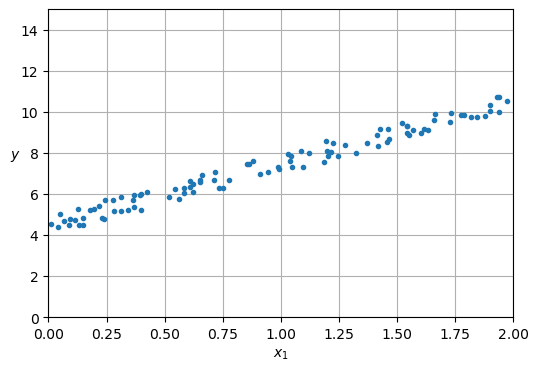

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, '.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

Compute $\hat{\theta}$ by using the Normal Equation. We use ```inv()``` to compute inverse of matrix and ```dot()``` for dot product of matrix multiplication. 

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 for each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # @ operator for matrix multiplication == np.matmul(X_b.T, X_b)

In [5]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_pred = X_new_b @ theta_best

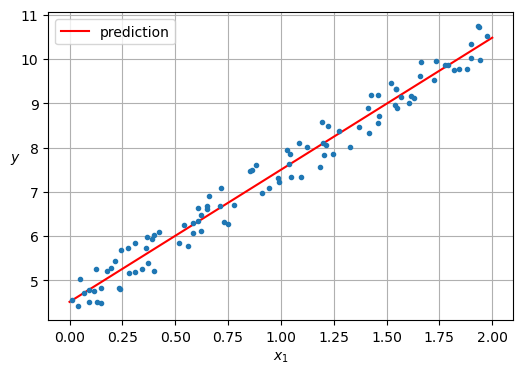

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_pred, 'r-', label='prediction')
plt.plot(X, y, '.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [8]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [9]:
y_pred

array([[ 4.51359766],
       [10.48006601]])

In [10]:
# Now, we use LinearRegression to compute hyperparameters
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)  # model learns on training set

LinearRegression()

- The model gives the bias term ```intercept_``` from feature weights ```coef_```.
- They close enough to expected values 4 and 3

In [11]:
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [12]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

# 2.Gradient Descent
GD is a generic optimization algorithm capable of finding optimal solution to a wide range of problems. It tweaks parameters iteratively in order to minimized a cost function. 

Filling $\theta$ with random values (random initialization). Then improve it gradually, taking one small step at a time, each step attemding to decrease the cost function (eg. MSE) until the algorithm converges to minimum
- Important parameter in GD is the size of the steps (called ```learning-rate``` hyperparameter). If the learning rate is too small, so the algorithm will have to go through many iterations to converge, which take long time. On the other hand, if we choose the learning too high, it will jumb across the valley and end up on the other side, possibly even higher up than you were before. 
- Finally, not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregualar terrains, making convergence to the minimum difficult.
## 2.1. Batch Gradient Descent
We compute the gradient of the cost function with regard to each model parameter $\theta_j$. In other words, we need to calculate how much the cost function will change if we change $\theta_j$ just a little bit. This is called the __Partial Derivative__

Partial Derivatives of the cost function:
$$\displaystyle{\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum^m_{i=1}\left(\theta^Tx^{(i)} - y^{(i)} \right)x^{(i)}_j}$$

Gradient Vector of the cost function
$$\displaystyle{
\nabla_{\theta}MSE(\theta) = \begin{pmatrix}
\frac{\partial}{\partial\theta_0}MSE(\theta) \\
\frac{\partial}{\partial\theta_1}MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial\theta_n}MSE(\theta) 
\end{pmatrix} = \frac{2}{m}X^T\left(X\theta - y\right)}$$

- this formula involves calculations over the full training set X, at each Gradient Descent step. This algorithm is called Batch Gradient Descent.

Once we have the gradient vector, we subtract with the model's parameter $\theta$ and learning rate $\eta$

$$\displaystyle{\theta^{i + 1} = \theta^i - \eta\nabla_{\theta}MSE(\theta)}$$

In [13]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

In [14]:
theta

array([[ 0.49671415],
       [-0.1382643 ]])

In [15]:
## tweak the theta with GD
for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [16]:
## got the final theta
theta

array([[4.51359766],
       [2.98323418]])

In [17]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    epochs = 1000
    n_shown = 20
    thetas = list()
    for epoch in range(epochs):
        if epoch < n_shown:
            y_pred = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_pred, linestyle='solid', color=color)
        gradients = 2/m * X_b.T @ (X_b @ theta - y) 
        theta = theta - eta * gradients
        thetas.append(theta)
    plt.xlabel('$x_1$')
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr'$\eta = {eta}$')
    return thetas

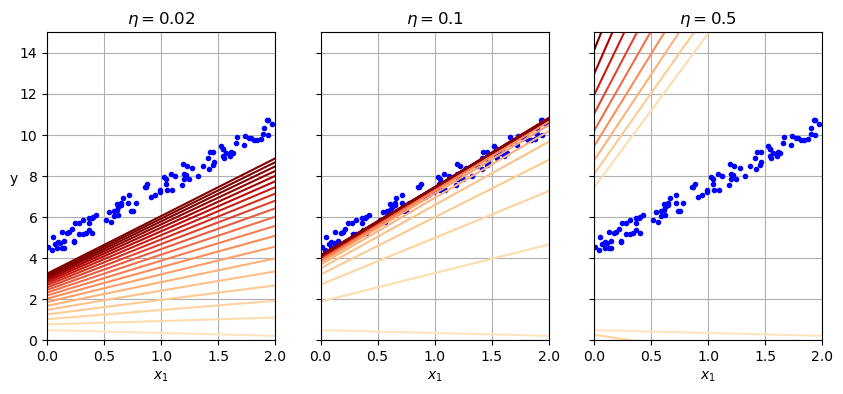

In [18]:
np.random.seed(42)
theta = np.random.randn(2, 1)
plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('y', rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)

plt.show()

- first graph, the learning rate is too low, the algorithm is eventually reach the solution, but it will take a long time.
- second graph, the learning rate is pretty good, it takes few epoch to converge to the solution.
- third graph, the learning rate is too high, the algorithm diverges, jumping all over the place and never reach the final solution.

To find the good rate, we can use the grid search, but setting the epoch is difficult. Solution is the setting high epoch and interrupt the algorithm when the gradient vector becomes tiny. When its norm (distance of vector) become smaller than a tiny number $\epsilon$ (called __tolerance__).
## 2.2. Stochastic Gradient Descent
The problem of Batch Gradient Descent is using of whole training set to compute the gradients at every step, which is very low for the large training set. The Stochastic Gradient Descent picks up randomly an instance to compute the gradients at single step. 

However, instead of reach the minimum, the cost function will bounce up and down, descreasing only on average. Overtime it will end up very close to minimum, and when it stops, the final parameters look good, but not optimal.

One solution to this is to gradually reduce the learning rate. The steps start out large (quickly escape local minima), then get smaller and smaller, allowing the algorithm settle at the global minimum. This process is called __Simulated annealing__

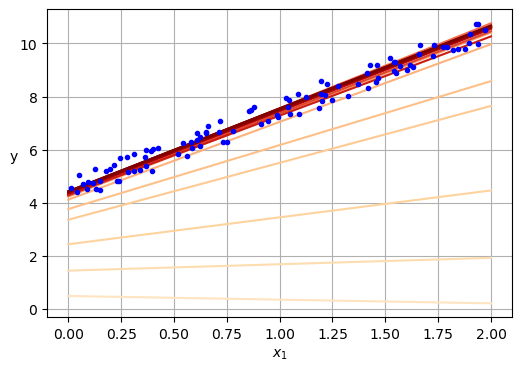

In [19]:
epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
thetas_sgd = list()

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

n_shown = 20
plt.figure(figsize=(6, 4))

for epoch in range(epochs):
    for iteration in range(m):
        # generate the figure
        if epoch == 0 and iteration < n_shown:
            y_pred = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_pred, color=color)
            
        random_idx = np.random.randint(m)
        xi = X_b[random_idx : random_idx + 1]
        yi = y[random_idx : random_idx + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # SGD does not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        thetas_sgd.append(theta)
        
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('y', rotation=0)
plt.grid()
plt.show()

In [20]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [21]:
from sklearn.linear_model import SGDRegressor 

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

this process runs 1000 epochs (max_iter) or until loss drops less than 1e-5 (tol) during 100 epochs (n_iter_no_change). It starts with leaning rate of 0.01 (eta0), using the default learning schedule. Lastly, it does not use any regularization (penalty) 
## 2.3. Mini-batch Gradient Descent
Mini-batch GD computes on small random set of instances called mini-batches. Mini-batch GD will end up walking around a bit closer to the minimum than SGD, but it may be harder for it to escape from the local minima

In [23]:
from math import ceil

epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)
t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

thetas_mgd = list()
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        thetas_mgd.append(theta)

In [24]:
theta

array([[4.52893866],
       [3.00037078]])

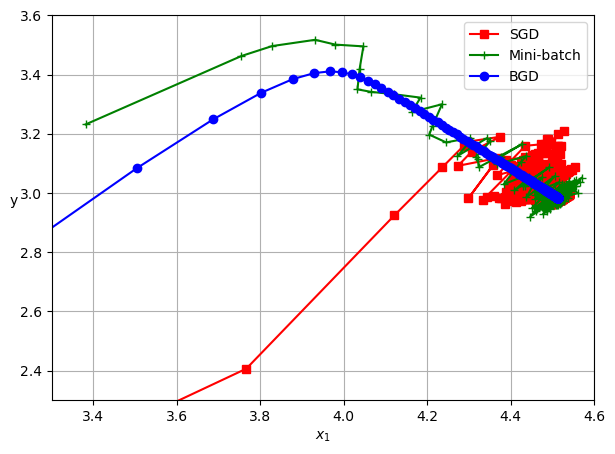

In [25]:
thetas_bgd = np.array(theta_path_bgd)
thetas_sgd = np.array(thetas_sgd)
thetas_mgd = np.array(thetas_mgd)

plt.figure(figsize=(7, 5))

plt.plot(thetas_sgd[:, 0], thetas_sgd[:, 1], 'r-s', label='SGD')
plt.plot(thetas_mgd[:, 0], thetas_mgd[:, 1], 'g-+', label='Mini-batch')
plt.plot(thetas_bgd[:, 0], thetas_bgd[:, 1], 'b-o', label='BGD')
plt.axis([3.3, 4.6, 2.3, 3.6])
plt.legend()
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('y', rotation=0)
plt.show()

# 3. Polynomial Regression
Data is more complex, and the linear model does not fit to it. Fore example, $y = ax^2 + bx + c$

- ```PolynomialFeature(degree=d)``` transforms an array containing n features into an array containing ```(n + d)! / n!d!``` features, where n! is the factorial of n.

In [26]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

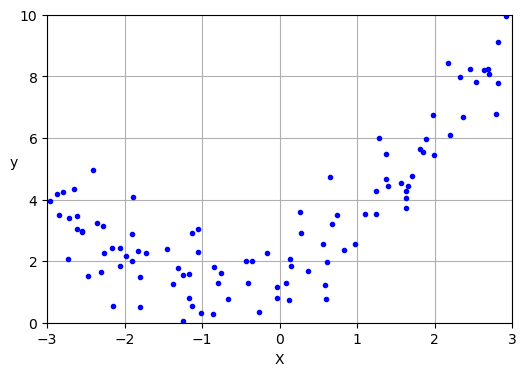

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_f.fit_transform(X)
X_poly.shape

(100, 2)

In [29]:
poly_f.get_params()

{'degree': 2, 'include_bias': False, 'interaction_only': False, 'order': 'C'}

In [30]:
# X_poly contains the original feature of X, and the square of this feature to fit a Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

The model estimates $y = 0.56X^2 + 0.93X + 1.78$ that close enough to the original function $y = 0.5X^2 + X + 2 + \text{Gaussian noise}$ 

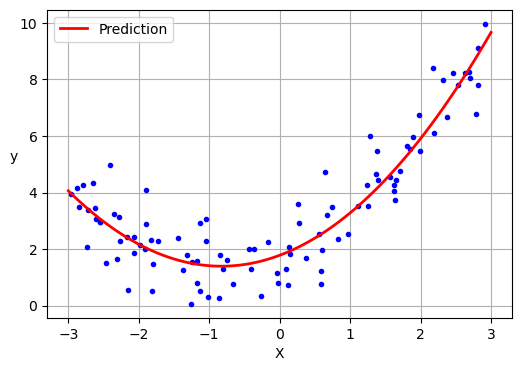

In [31]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_f.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Prediction')
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.legend()
plt.grid()
plt.show()

## 3.1. Learning Curve
To perform high-degree Polynomial Regression, it will fit to the training data much better than with plain Linear Regression. High-degree is the number hyperparameters of the Polynomial model.

The high-degree Polynomial regression is severely __overfitting__, while linear model is __underfitting__ it. In face, we don't know how to complex model would be. The __Cross-Validation__ can give an estimate of model's generalization performance. If model perform well on the training set but generalizes poorly accourding to the cross-validation metrics, then this model is _overfitting_. If it performs poorly in both, then it is _underfitting_. 

Another way to look at the __learning curve__. This plots the model's training error and validation error as a function of training iteration. Just evaluate the model at regular intervals during training on both training set and validation set. If the model does not support ```partial_fit() or warm_start```, then we must just train model several time on subsets of the training set.

The ```learning_curve()``` of sklearn will train and evaluate the model using cross-validation. But if the model supports incremental learning, we can set ```exploit_incremental_learning=True``` when calling learning_curve() (The __incremental learning__ is a technique to extend the exit model's knowledge to further train the model.)

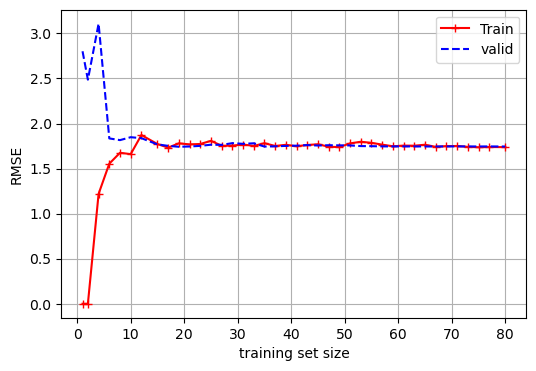

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, 'r-+', label='Train')
plt.plot(train_sizes, valid_errors, 'b--', label='valid')
plt.xlabel('training set size')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

### Error Analysis
This model is _underfitting_. 
- First, the training error is good with a few instance to train (error = 0), but rapidly increase and plateau when more instances added to training set. Because the data is noisy and it is not the linear. Which more training instances are adding that doesn't make the average error much better or worse. 
- The validation error, when the model train a few instances, it is incapable of generalizing properly, and the error is so high. Then the model adds more training instance and it go down, but go straight line cannot go the good job modeling the data. So, the error ends up at plateau, close to the other curve.

This learning curve are __underfitting__. Both curves have reached a plateau; they are close and fairly high.

**Now look at the learning curves of a 10th-degree polynomial model on the same data.**

In [33]:
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(poly_reg, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_root_mean_squared_error')

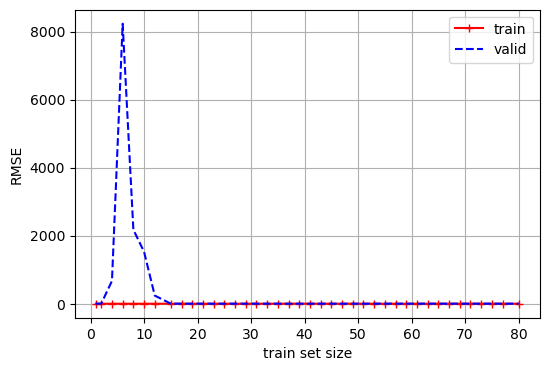

In [34]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, 'r-+', label='train')
plt.plot(train_sizes, valid_errors, 'b--', label='valid')
plt.xlabel('train set size')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

In [35]:
poly_reg.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('linearregression', LinearRegression())])>

Amazing, the training errors remain steady at zero in the whole training sets, and validation errors drop dramatically after a few instances and cover to zero for the whole training sets. That means, the model performs very good on the training sets in both training and validation, which is an overfitting model.
### The Bias/Variance trade-off
#### Bias
The generalization error is due to wrong assumptions. A high-bias model is most likely to underfitting 
#### Variance
This part is due o the model's exessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data
#### Inrreducible error
This part is due to noisiness of the data itself. To reduce this error is to clean up the data (eg. fix data source, detect and remove outliers)

Increasing model complexity will typically inscrease its variance and reduce its bias. Reducing a model's complexity increases its bias and reduces its variance.
## 4. Regularized Linear Models
Good way to reduce an overfitting is to regularize the model (ie. to constrain it).

For linear model, regularization is typically to constrain the weights of the model. which are:
> Ridge Regression, Lasso Regression, and Elastic Net, which are three different ways to constrain the weights
### 4.1. Ridge Regression
The regularized version of Linear Regression. This will force the learning algorithm to not only fit the data but also keep the model weights as small as possible. This term should only add to the cost function

> Ridge Regression
$$\displaystyle{J(\theta) = MSE(\theta) + \frac{\alpha}{m}\sum^n_{i=1}\theta_i^2}$$

- if $\alpha$ = 0, then Ridge regression is just Linear regression. If it is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

**Important**: scale the data before performing Ridge Regression. This is true of most regularized models.

As with Linear Regression, computing a *losed-form equation* by both perform Rdige Regression or Gradient Descent.

> Ridge Regression closed-form solution
$$\displaystyle{\hat{\theta} = (X^TX + \alpha A)^{-1}X^Ty}$$

with A is the (n + 1)(n + 1) identify matrix, except with a 0 in the top-left cell, corresponding to the bias term.

In [36]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)/1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

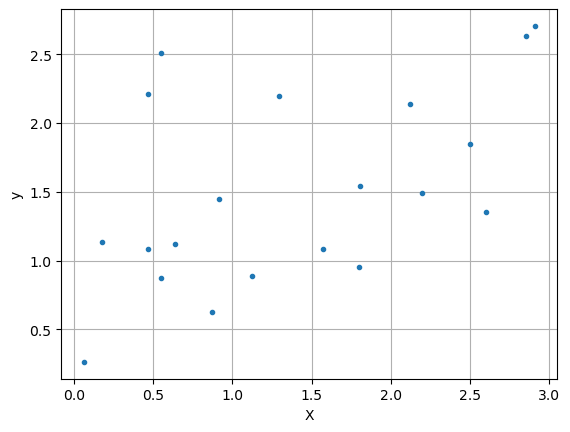

In [37]:
plt.plot(X, y, '.')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

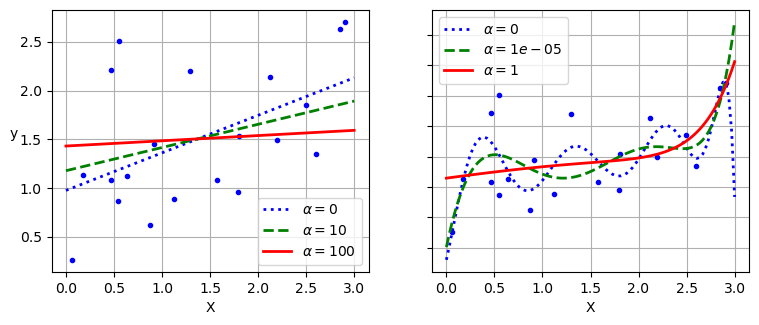

In [39]:
from sklearn.preprocessing import StandardScaler


def plot_model(model_c, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, 'b.')
    for alpha, style in zip(alphas, ('b:', 'g--', 'r-')):
        if alpha > 0:
            model = model_c(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),
                                 StandardScaler(),
                                 model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2, label=fr'$\alpha = {alpha}$')
    plt.legend()
    plt.xlabel('X')
    plt.grid()
    
plt.figure(figsize=(9, 3.4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel('y', rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [40]:
## perform Ridge Regression using a closed-form solution and SGD solution
## SGD
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1/m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() to convert y to 1D array
sgd_reg.predict([[1.5]])

array([1.55302613])

In [41]:
## Ridge and using the Stochastic Average GD (solver='sag')
ridge_reg = Ridge(alpha=0.1, solver='sag', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

In [42]:
ridge_reg.intercept_, ridge_reg.coef_

(array([0.97896386]), array([[0.38286422]]))

In [43]:
## uses the closed-form solution of Ridge regression, compare with the Ridge's hyperparameters
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])  # identify matrix
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

### 4.2. Lasso Regression
*Least Absolute Shrinkage and Selection Operator Regression* (called Lasso Regression) is another regularized version of Linear Regression: like the Ridge Regression, it adds a regularization term to the cost function, but it use $l_1$ norm of the weight vector instead of the square of the $l_2$ norm. 
> Lasso Regression cost function
$$\displaystyle{J(\theta) = MSE(\theta) + 2\alpha\sum^n_{i=1}|\theta_i| \\ \text{where: |}\theta_i| \text{ is the } l_1  norm}$$ 

Important charasteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (ie. set them to zero). 

To avoid the Gradient Descent from bouncing around the optimum at the end when using Lasso, we need to gradually reduce the *learning rate* during training (it will still bounce around the optimum, but the step will get smaller and smaller, so it will converage.

The Lasso cost function is not differentiable at $\theta_i = 0$ (for i= 1, 2, ..., n), but the Gradient Descent still work fine if using a subgradient vector g instead of when any $\theta_i = 0$.
> Lasso Regression subgradient vector
$$\displaystyle{g(\theta, J) = \nabla_{\theta}MSE(\theta) + 2\alpha\begin{pmatrix}
sign (\theta_1) \\ 
sign (\theta_2) \\ 
\vdots \\ 
sign (\theta_n) 
\end{pmatrix} 
\quad \text{where } sign(\theta_i) = 
\begin{cases}
-1 & \quad \text{if } \theta_i < 0 \\ 
 0 & \quad \text{if } \theta_i = 0 \\ 
+1 & \quad \text{if } \theta_i > 0 
\end{cases}}$$

In [44]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

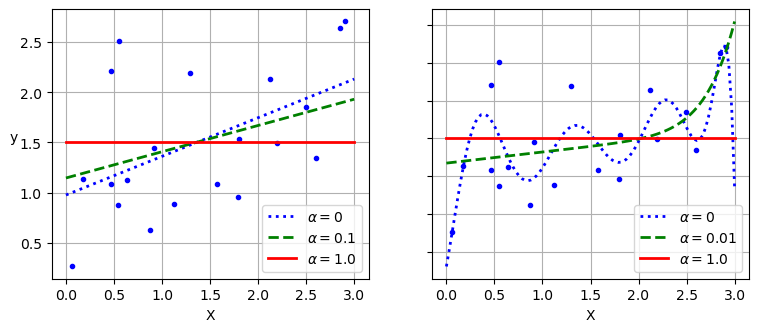

In [45]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1.), random_state=42)
plt.ylabel('y', rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1.), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

### 4.3. Elastic Net
Elastic Net is the middle ground between Ridge Regression and Lasso Regression. The regularization term is a weighted sum of both Ridge and Lasso's regularization term, and we can control the mix ratio *r*. When *r=0*, Elastic Net is the Ridge regression, and when *r=1*, it is the Lasso regression.
> Elastic Net cost function
$$\displaystyle{J(\theta) = MSE(\theta) + \mathcal{r}\left(2\alpha\sum^n_{i=1}|\theta_i|\right) + (1 - \mathcal{r})\left(\frac{\alpha}{m}\sum^n_{i=1}\theta^2_i\right)}$$

***Generally***, We should prefer to use a one of regularization regressions, rether than the Plain regression (without any regularization). Ridge is a good default. But if we suspect that only few features are useful, we should prefer Lasso or Elastic Net because they tend to reduce the useless features' weights down to zero. 

Elastic Net is preferred over Lasso when the number of feature is greater than the number of training instances or when several features are strongly correlated (Lasso may behave erratically)

In [46]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio corresponds to the mix ratio r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### 4.4. Early Stopping
Early Stopping is like Gradient Descent, that are the *regularize iterative learning algorithm*. But the Early stopping is to stop training as soon as the validation error reaches a minimum. 

In [47]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X**2 + X + 2 + np.random.randn(m, 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.5)

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
Xtrain_prep = preprocessing.fit_transform(X_train)
Xvalid_prep = preprocessing.transform(X_valid)

In [48]:
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
# sgd_reg = SGDRegressor(penalty='l2', tol=1e-2, eta0=0.002, random_state=42)
epochs = 500
best_valid_rmse = float('inf')
train_errors, valid_errors = [], []

In [49]:
for epoch in range(epochs):
    sgd_reg.partial_fit(Xtrain_prep, y_train)
    y_valid_pred = sgd_reg.predict(Xvalid_prep)
    val_error = mean_squared_error(y_valid, y_valid_pred, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
        
    y_train_pred = sgd_reg.predict(Xtrain_prep)
    train_error = mean_squared_error(y_train, y_train_pred, squared=False)
    valid_errors.append(val_error)
    train_errors.append(train_error)
    
best_epoch = np.argmin(valid_errors)

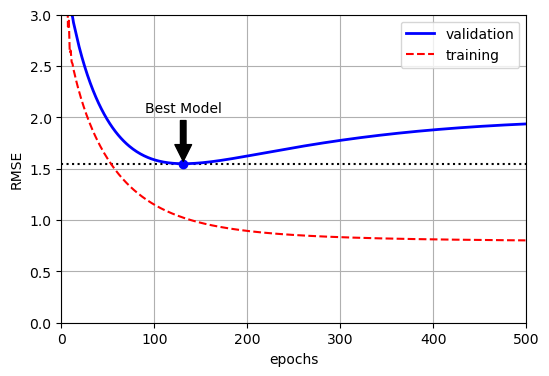

In [50]:
plt.figure(figsize=(6, 4))
plt.annotate('Best Model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + .5),
             ha='center',
             arrowprops=dict(facecolor='black', shrink=.05))
plt.plot([0, epochs], [best_valid_rmse, best_valid_rmse], 'k:')
plt.plot(valid_errors, 'b-', linewidth=2, label='validation')
plt.plot(best_epoch, best_valid_rmse, 'bo')
plt.plot(train_errors, 'r--', label='training')
plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.axis([0, epochs, 0, 3])
plt.show()

- **Valid error stops descreasing** and starts to go up, this indicates the model has started to overfit.
- **Valid error continues descreasing** that the model has been a good learning  
- The `partial_fit()` instead of `fit()` to perform incremental learning.
- The copy.deepcopy() to copy both model's hyperparameters and the learned parameters. The sklearn.base.clone() only copies the model's hyperparameters.

# Part 02: Logistic Regression
Logistic regression (called logit regression) is commonly used to estimate the probability that an instance belongs to a particular class (eg. if the estimated probability greater than the threshold (50% for example), then the model predicts that the instance belongs to that class (called the positive class, labeled '1'), and otherwise it predicts that it belongs to the opposite class (negative class, labeled '0'). This makes it a binary classifier.
## 1. Estimating Probabilities
Logistic regression model compute the weighted sum (like Linear regression) of the input features (plus the bias term), but the model does not output the result directly. It outputs the logistic of result. Noted $\sigma(.)$ is a *sigmoid function* that outputs a number between 0 and 1.
> Logistic function
$$\displaystyle{\sigma(t) = \frac{1}{1 + \exp^{-t}}}$$
> Logistic regression model estimated probability (vectorized form)
$$\displaystyle{\hat{p} = h_{\theta}(x) = \sigma(\theta^Tx)}$$

Once the Logistic regression model has estimated the probability $\hat{p}$ of a instance x, that is easy to make a prediction $\hat{y}$
> Logistic regression model prediction using a threshold probability 50%
$$\displaystyle{\hat{y} = \begin{cases}
0 &\quad \text{if } \hat{p} < 0.5 \\
1 &\quad \text{if } \hat{p} > 0.5
\end{cases}}$$

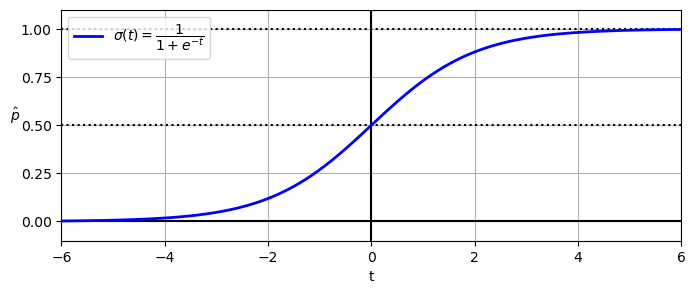

In [51]:
lim = 6
t = np.linspace(-lim, lim, 100) 
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], 'k-')
plt.plot([-lim, lim], [.5, .5], 'k:')
plt.plot([-lim, lim], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth=2, label='$\sigma(t) = \dfrac{1}{1 + e^{-t}}$')
plt.xlabel('t')
plt.ylabel('$\hat{p}$', rotation=0)
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.legend()
plt.show()

## 2. Training and Cost Function
The model estimates the probability (high for positive y=1, and low for negative y=0) on the parameter vector of the training objective.
> Cost function of a single training instance
$$cost(\theta) = \begin{cases}
-log(\hat{p}) &\quad \text{if } y= 1 \\
-log(1 - \hat{p}) &\quad \text{if } y= 0
\end{cases}$$

A -log(t) grows very large if t approachs 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance. And it will be very large if model estimates a probability close to 1 for a negative instance. 

On the other hand, -log(t) close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is lose to 0 for a negative instance or close to 1 for a positive instance.

The cost function over the whole training set is the average cost over all training instances.
> Logistic Regression cost function (log loss)
$$\displaystyle{J(\theta) = -\frac{1}{m}\sum^m_{i=1}[y^ilog(\hat{p}^i) + (1 - y^i)log(1 - \hat{p}^i]}$$

There is no known closed-form equation to compute the value of $\theat$ that minimize the cost function (no equivalent of the Normal Equation).
## 3. Decision Boundaries

In [52]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [53]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [54]:
iris.target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [55]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
iris.target.unique()

array([0, 1, 2])

In [57]:
iris.target.shape

(150,)

In [58]:
from sklearn.linear_model import LogisticRegression

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'

In [59]:
y[:5]

array([False, False, False, False, False])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [61]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape a row to cols
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

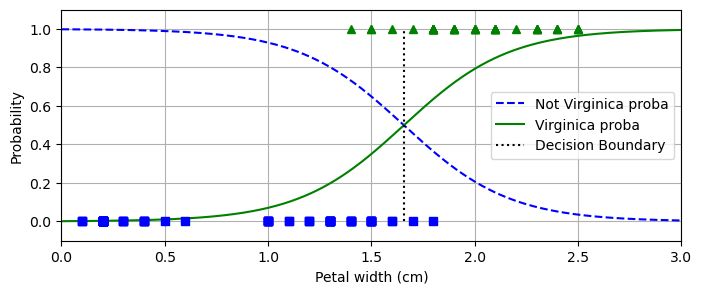

In [62]:
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Virginica proba')
plt.plot(X_new, y_proba[:, 1], 'g-', label='Virginica proba')
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', label='Decision Boundary')
plt.plot(X_train[y_train == 0], y_train[y_train == 0], 'bs')
plt.plot(X_train[y_train == 1], y_train[y_train == 1], 'g^')
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.axis([0, 3, -0.1, 1.1])
plt.legend()
plt.grid()
plt.show()

In [63]:
decision_boundary

1.6576576576576576

In [64]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

## 3. Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called *Softmax Regression* or Multinomial Logistic Regression.

When given an instance x, the Softmax regression model first computes a score $s_k(x)$ for each class k, then estimate the probabiltiy of each class by applying the **softmax function** (also called *normalized exponential*) to the scores.
> Softmax score for class k
$$\displaystyle{s_k(x) = \left(\theta^{(k)}\right)^Tx}$$

Note that each class has its own parameter vector $\theta^{(k)}$. All these vectors are typically stored as rows in a *parameter matrix $\Theta$*.

After computed score for every classes of an instance, we go to estimate probability that the instance belongs to class k by softmax function. The function computes the exponential of every score, then normalizes them.
> Softmax function
$$\displaystyle{\hat{p}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum^K_{j=1}exp(s_j(x))}}$$

where:
- K is the number of classes
- s(x) is a vector containing the scores of each class for the instance x
- $\sigma(s(x))_k$ is the estimated probability that the instance x belong to class k, given the scores of each class for that instance.

### 3.1. Cross Entropy
Minimizing the Cost function of Logistic Regression. Cross Entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.
> Cross Entropy Cost Function
$$\displaystyle{J(\Theta) = -\frac{1}{m}\sum^m_{i=1}\sum^K_{k=1}y^{(i)}_klog\left(\hat{p}^{(i)}_k\right)}$$

Where:
- $y^{(i)}_k$ is the target probability that $i^{th}$ instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.
- When K=2, just two classes this cost function is equivalent to the Logisic Regression's cost function.

The gradient vector of this cost function with regard to $\theta^{(k)}$ is
> Cross entropy gradient vector for class k
$$\displaystyle{\nabla_{\theta^k}J(\Theta) = \frac{1}{m}\sum^m_{i=1}\left(\hat{p}^{(i)}_k - y^{(i)}_k\right)x^{(i)}}$$

So, we can compute gradient vector for every class, then use Gradient Descent (or any optimization algorithm) to find the parameter matrix $\Theta$ that minimizes the cost function.

In [65]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target'].values

In [66]:
## adding the bias term for every instance (x0 = 1), easy way is using add_dummy_feature().
X_bias = np.c_[np.ones(len(X)), X]

In [67]:
## split dataset into train, valid, test sets
test_ratio = 0.2
valid_ratio = 0.2
total_size = len(X_bias)

test_size = int(total_size * test_ratio)
valid_size = int(total_size * valid_ratio)
train_size = total_size - test_size - valid_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_bias[rnd_indices[valid_size : -test_size]]
y_valid = y[rnd_indices[valid_size : -test_size]]
X_test = X_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for any given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance. To understand this code, you need to know that `np.diag(np.ones(n))` creates an n×n matrix full of 0s except for 1s on the main diagonal. Moreover, if a is a NumPy array, then `a[[1, 3, 2]]` returns an array with 3 rows equal to `a[1], a[3] and a[2]` 

In [68]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

In [69]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [70]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [71]:
y_train_onehot = to_one_hot(y_train)
y_valid_onehot = to_one_hot(y_valid)
y_test_onehot = to_one_hot(y_test)

In [72]:
## implement the softmax function.
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums

In [73]:
n_inputs = X_train.shape[1]  # ==3 (2 features + bias term)
n_outputs = len(np.unique(y_train))

In [74]:
## scale the input, with mean and std of each feature without bias term
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [75]:
## implement a training with cross entropy cost function and cross entropy gradient
eta = 0.5
epochs = 5001
m = len(X_train)
epsilon = 1e-5  # add a tiny value to avoid NAN value of output

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)  # initialize values for theta

for epoch in range(epochs):
    logits = X_train @ Theta
    y_proba = softmax(logits)
    if epoch % 1000 == 0:
        y_valid_proba = softmax(X_valid @ Theta)
        entropy_losses = -(y_valid_onehot * np.log(y_valid_proba + epsilon))  # adding epsilon to avoid zero, log(0)= NaN
        print(epoch, entropy_losses.sum(axis=1).mean())
    error = y_proba - y_train_onehot
    gradients = 1/m * X_train.T @ error
    Theta = Theta - eta * gradients

0 3.6695811678841403
1000 0.11193214456390922
2000 0.10001749247631414
3000 0.09323673019141271
4000 0.08882541997205054
5000 0.08592965232560543


In [76]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

In [77]:
## make predictions for the validation set and check accuracy
logits = X_valid @ Theta
y_proba = softmax(logits)
y_pred = y_proba.argmax(axis=1)  # get idx of max value at each row

accuracy_score = (y_pred == y_valid).mean()
accuracy_score

0.9444444444444444

Well, this model looks pretty ok. For the sake of the exercise, let's add a bit of $\mathcal{l}_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\mathcal{l}_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [78]:
eta = 0.5  # learning rate
epochs = 5001
m = len(X_train)
epsilon = 1e-5  # to avoid null value in a result
alpha = 0.01  # regularizaion hyperparameter

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(epochs):
    logits = X_train @ Theta
    y_proba = softmax(logits)
    if epoch % 1000 == 0:
        y_valid_proba = softmax(X_valid @ Theta)
        entropy_losses = -(y_valid_onehot * np.log(y_valid_proba + epsilon))
        l2_loss = 1/2 * (Theta[1:]**2).sum()   # first row of theta is the bias term, we don't use it
        total_loss = entropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = y_proba - y_train_onehot
    gradients = 1/m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]  # additional term
    Theta = Theta - eta * gradients

0 3.6982
1000 0.2962
2000 0.2962
3000 0.2962
4000 0.2962
5000 0.2962


In [79]:
gradients

array([[-3.36502842e-15, -4.16480608e-16,  3.77058644e-15],
       [ 5.64513714e-14,  4.34643641e-14,  3.76712550e-14],
       [ 7.03014036e-14,  8.66424987e-14,  8.79261941e-14]])

In [80]:
## make predictions for the validation set and check accuracy
logits = X_valid @ Theta
y_proba = softmax(logits)
y_pred = y_proba.argmax(axis=1)  # get idx of max value at each row

accuracy_score = (y_pred == y_valid).mean()
accuracy_score

0.9444444444444444

In that case, the $\mathcal{l}_2$ penalty did not change the test accuracy, Perhaps try fine-tuning alpha?

Now, let's add early stopping. We need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [81]:
eta = 0.5
epochs = 5001
m = len(X_train)
epsilon = 1e-5
C = 100  # regularization hyperparameter, 
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(epochs):
    logits = X_train @ Theta
    y_proba = softmax(logits)
    y_valid_proba = softmax(X_valid @ Theta)
    xentropy_losses = -(y_valid_onehot * np.log(y_valid_proba + epsilon))
    l2_loss = 1/2 * (Theta[1:]**2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1/C * l2_loss  # 
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch -1, best_loss.round(4))
        print(epoch, total_loss.round(4), 'early stopping')
        break
    error = y_proba - y_train_onehot
    gradients = 1/m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1/C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.6982
369 0.2961
370 0.2961 early stopping


In [82]:
## make predictions for the validation set and check accuracy
logits = X_valid @ Theta
y_proba = softmax(logits)
y_pred = y_proba.argmax(axis=1)  # get idx of max value at each row

accuracy_score = (y_pred == y_valid).mean()
accuracy_score

0.9444444444444444

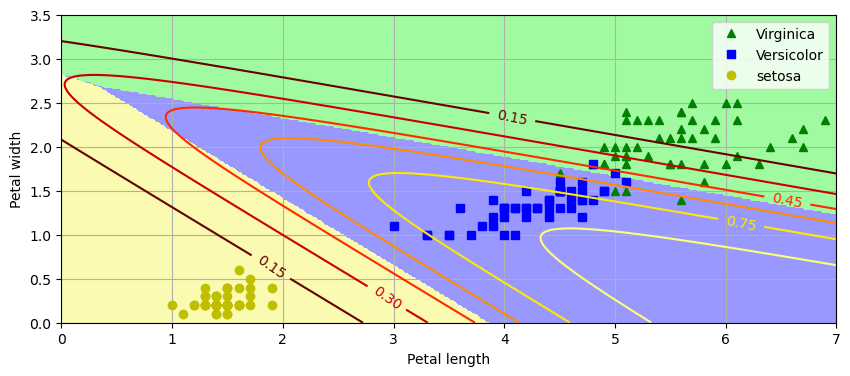

In [83]:
import matplotlib as mpl

custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std   # scaling
X_new_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_bias @ Theta
y_proba = softmax(logits)
y_pred = y_proba.argmax(axis=1)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='setosa')

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap='hot')
plt.clabel(contour, inline=1)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.grid()
plt.legend()
plt.axis([0, 7, 0, 3.5])
plt.show()

- The figure shows the probability for the Iris versicolor which is 0.30 (30% probability boundary). The model can predict a class that have estimated probabily below 50% . For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%. 

In [84]:
## check final accuracy with a test set
logits = X_test @ Theta
y_proba = softmax(logits)
y_pred = y_proba.argmax(axis=1)

acc_score = (y_pred == y_test).mean()
acc_score

0.9666666666666667

In [85]:
Theta

array([[ 0.25978902,  2.02724696, -1.28089758],
       [-2.24000947,  0.46212101,  1.9429649 ],
       [-1.89327031, -0.36312666,  2.55019185]])

We have the best model's performance with high score on the test set. The result is depending on how we sampling the training dataset, validation set, and test set. Try to use different size of all sets and changing a ramdom seed. Runing model several times to see the results will vary.

In [86]:
## development with sklearn's LogisticRegression 
from sklearn.linear_model import LogisticRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Xtrain.shape, Xtest.shape

((120, 2), (30, 2))

In [87]:
logit_reg = LogisticRegression(C=1, random_state=42)  # inverse regularization, small value to strong regularizing
logit_reg.fit(Xtrain, ytrain)

LogisticRegression(C=1, random_state=42)

In [88]:
logit_reg.predict([[5, 2]])

array([2])

In [89]:
logit_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.23, 0.77]])

In [90]:
y_pred = logit_reg.predict(Xtest)

acc_score = (ytest == y_pred).mean()
acc_score

1.0

In [91]:
ytest[0], y_pred[0]

(1, 1)

# Exercises
1. Million features, we can use SGD, Mini-Batch, or Batch-GD if it fits to memory. Can't use Normal Equation or SVD because computational complexity grows quickly (quadratic) with the number of features
2. Many different scales of features? We should scale them before model training. Normal equation and SVD work fine without scale. Regularized models may converge to a suboptimal solution if the features are not scaled. Model will ignore to compare features which are large weights to the features smaller value.
3. GD cannot get stuck on the local minimum when training with Logistic Regression because the cost function is convex (Convex means if we draw any straight line  between any two points on the curve, the line never cross the curve).
4. If the optimization problem is convex (such as Linear regression and Logistic regression), and assuming the learning rate is not too high, all GD algorithms will approach the global optimum and end up producing fairly similar models. But SGD and Mini-Batch GD will keep jumping back and forth around the global optimum (unless learning rate is low). That means they will produce different models if they run too long time.
5. The Batch GD, if the validation error goes up after every epochs, this means the *learning rate* too high and the algorithm is diverging. If the training error also goes up, that we should reduce learning rate. But, if the training error is not going up, the model is overfitting, should stop training.
6. If the validation error goes up (SGD, Mini-batch), stop training befor it reach global optimum, but we need to save model at regular intervals, then when it has not improved for long time. We can revert to the best saved model.
7. SGD is the fastest training iteration (it only needs one instance at a time). But Batch GD is only converge, given enough training time. SGD and Mini-batch will converge if reduce learning rate.
8. A large gap between validation error and training error (learning curve). If validation error is much higher than training error, model is overfit. One way to solve it that reduce the degree (polynomial), adding regularization to model (eg. add l2 penalty (Ridge), l2 penalty (Lasso) to cost function. That will reduce the degree of freedom of the model. Lastly, increase the size of training
9. Ridge regression, if both training and validation error are high and equal, the model is likely underfitting the training set, which means high bias. We should reduce the regularization hyperparameter $\alpha$
10. Using Ridge instead of Plain Linear regression: if model's performance better with some regularizations
- Lasso uses l2 penalty, which reduce weights to zero, except for the most important weights. That good if we know few feature is matter, if not refer using Ridge.
- Elastic Net prefferred than Lasso, because Lasso may behave erratically in some cases (features have strongly corrletion together, or have more features than training set). But Elastic Net has more hyperparameters to tune. use the Elastic with an `l1_ratio` close to 1.
11. If we want to classify picture model which has a pair classes (indoor/outdoor, night/day), we should use 2 logistic regression classifiers. 